In [38]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [39]:


# Convert the dataset from .csv to a Pandas DataFrame - so_df (Stack Overflow Dataframe)
so_df = pd.read_csv(os.path.join(r"C:\Users\Shreni\My BU Assignments\AI\Final Project", "train.csv"), on_bad_lines='skip',engine="python")#, nrows=1000000)
#so_df = pd.read_csv(os.path.join(r"/Users/srujana/Desktop/Artificial Intelligence/AI-FinalProject/", "train.csv"), on_bad_lines='skip',engine="python")#, nrows=1000000)

In [40]:
so_df

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,4,07/31/2008 21:42:52,8,07/31/2008 21:33:24,1,0,Decimal vs Double?,"I'm new to C#, and I want to use a trackbar fo...",c#,NaN,NaN,NaN,NaN,NaN,open
1,6,07/31/2008 22:08:08,9,07/31/2008 21:35:26,1,0,Percentage width child in absolutely positione...,I've got an absolutely positioned div containi...,html,css,NaN,NaN,NaN,NaN,open
2,8,07/31/2008 23:33:19,9,07/31/2008 21:35:26,16,1,Tools for porting J# code to C#,Are there any conversion tools for porting Vis...,j#,NaN,NaN,NaN,NaN,NaN,open
3,9,07/31/2008 23:40:59,1,07/31/2008 14:22:31,1,1,How do I calculate someone's age in c#?,"Given a DateTime representing their birthday, ...",c#,NaN,NaN,NaN,NaN,NaN,open
4,9610539,03/07/2012 23:07:09,1021610,10/31/2011 08:26:49,29,0,retrieve data from NSUserDefaults to TableView,I save values of two labels through NSUserDefa...,iphone,objective-c,ios5,NaN,NaN,NaN,open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538647,6213643,06/02/2011 10:59:33,780972,06/02/2011 10:49:34,1,0,ASP .NET Send Cookies to client Browser,I'm integrating a single sign on over 2 ASP .N...,c#,.net,cookies,asp,httpcontext,NaN,open
1538648,6213644,06/02/2011 10:59:39,349826,05/25/2010 10:55:47,26,0,Vertical align of A elements inside LI,I have a problem with implementing a new desig...,css,vertical-alignment,NaN,NaN,NaN,NaN,open
1538649,6213652,06/02/2011 11:00:13,780545,06/02/2011 04:49:17,3,0,How to Scroll UIButtons?,ii want to scroll uibuttons when i am click o...,iphone,xcode,uibutton,scrollview,NaN,06/08/2011 09:39:55,not a real question
1538650,6213654,06/02/2011 11:00:22,780985,06/02/2011 10:55:05,1,0,How to decrypt the Obfuscated J2me file? (For ...,Im looking into decrypt the jar files. (Obfusc...,encryption,mobile,jar,obfuscation,decrypt,NaN,open


In [41]:
so_df.shape

(1538652, 15)

In [42]:
so_df.tail(5)

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
1538647,6213643,06/02/2011 10:59:33,780972,06/02/2011 10:49:34,1,0,ASP .NET Send Cookies to client Browser,I'm integrating a single sign on over 2 ASP .N...,c#,.net,cookies,asp,httpcontext,NaN,open
1538648,6213644,06/02/2011 10:59:39,349826,05/25/2010 10:55:47,26,0,Vertical align of A elements inside LI,I have a problem with implementing a new desig...,css,vertical-alignment,NaN,NaN,NaN,NaN,open
1538649,6213652,06/02/2011 11:00:13,780545,06/02/2011 04:49:17,3,0,How to Scroll UIButtons?,ii want to scroll uibuttons when i am click o...,iphone,xcode,uibutton,scrollview,NaN,06/08/2011 09:39:55,not a real question
1538650,6213654,06/02/2011 11:00:22,780985,06/02/2011 10:55:05,1,0,How to decrypt the Obfuscated J2me file? (For ...,Im looking into decrypt the jar files. (Obfusc...,encryption,mobile,jar,obfuscation,decrypt,NaN,open
1538651,6213655,06/02/2011 11:00:24,780990,06/02/2011 11:00:24,1,0,Calculate Median on Sql,Sorry as I am very new to SQL. I am trying to ...,sql,server,NaN,NaN,NaN,NaN,open


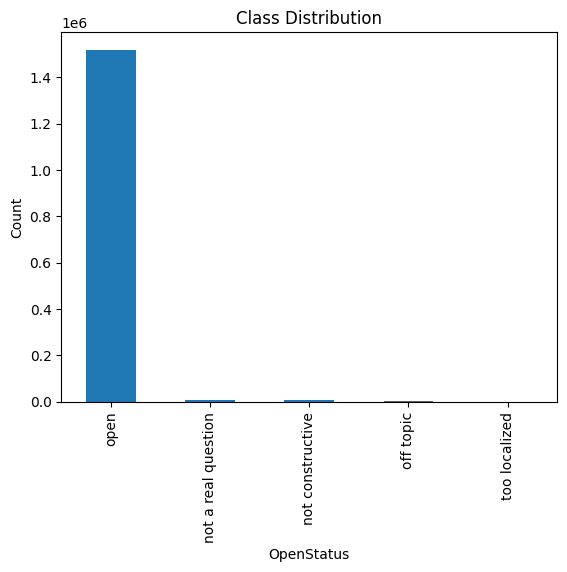

In [43]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'OpenStatus' column
so_df['OpenStatus'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('OpenStatus')
plt.ylabel('Count')
plt.show()

In [44]:
# Checking the number of samples from each class

class_distribution = so_df['OpenStatus'].value_counts()
print(class_distribution)

OpenStatus
open                   1518388
not a real question       7343
not constructive          6554
off topic                 5246
too localized             1121
Name: count, dtype: int64


In [45]:
so_df

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,4,07/31/2008 21:42:52,8,07/31/2008 21:33:24,1,0,Decimal vs Double?,"I'm new to C#, and I want to use a trackbar fo...",c#,NaN,NaN,NaN,NaN,NaN,open
1,6,07/31/2008 22:08:08,9,07/31/2008 21:35:26,1,0,Percentage width child in absolutely positione...,I've got an absolutely positioned div containi...,html,css,NaN,NaN,NaN,NaN,open
2,8,07/31/2008 23:33:19,9,07/31/2008 21:35:26,16,1,Tools for porting J# code to C#,Are there any conversion tools for porting Vis...,j#,NaN,NaN,NaN,NaN,NaN,open
3,9,07/31/2008 23:40:59,1,07/31/2008 14:22:31,1,1,How do I calculate someone's age in c#?,"Given a DateTime representing their birthday, ...",c#,NaN,NaN,NaN,NaN,NaN,open
4,9610539,03/07/2012 23:07:09,1021610,10/31/2011 08:26:49,29,0,retrieve data from NSUserDefaults to TableView,I save values of two labels through NSUserDefa...,iphone,objective-c,ios5,NaN,NaN,NaN,open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538647,6213643,06/02/2011 10:59:33,780972,06/02/2011 10:49:34,1,0,ASP .NET Send Cookies to client Browser,I'm integrating a single sign on over 2 ASP .N...,c#,.net,cookies,asp,httpcontext,NaN,open
1538648,6213644,06/02/2011 10:59:39,349826,05/25/2010 10:55:47,26,0,Vertical align of A elements inside LI,I have a problem with implementing a new desig...,css,vertical-alignment,NaN,NaN,NaN,NaN,open
1538649,6213652,06/02/2011 11:00:13,780545,06/02/2011 04:49:17,3,0,How to Scroll UIButtons?,ii want to scroll uibuttons when i am click o...,iphone,xcode,uibutton,scrollview,NaN,06/08/2011 09:39:55,not a real question
1538650,6213654,06/02/2011 11:00:22,780985,06/02/2011 10:55:05,1,0,How to decrypt the Obfuscated J2me file? (For ...,Im looking into decrypt the jar files. (Obfusc...,encryption,mobile,jar,obfuscation,decrypt,NaN,open


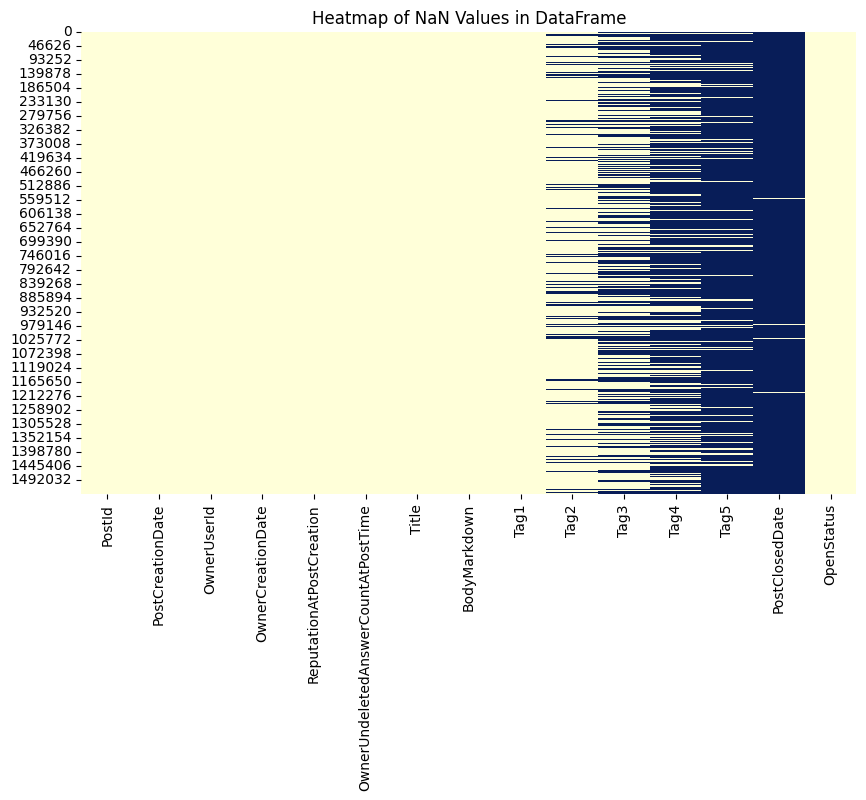

In [46]:
# Check for NaN or missing values in the dataframe
import seaborn as sns

# Create a boolean DataFrame indicating NaN values
nan_indicator_df = so_df.isnull()

# Plot heatmap for NaN values
plt.figure(figsize=(10, 6))
sns.heatmap(nan_indicator_df, cbar=False, cmap='YlGnBu')
plt.title('Heatmap of NaN Values in DataFrame')
plt.show()

In [47]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train, validation and test (80%, 10% and 10% respectively)
so_train_df, remaining = train_test_split(so_df, random_state=42, train_size=0.8, stratify=so_df.OpenStatus.values)
so_valid_df, so_test_df = train_test_split(remaining, random_state=42, train_size=0.50, stratify=remaining.OpenStatus.values)

# Display the shapes of the downsampled training and validation datasets
so_train_df.shape, so_valid_df.shape, so_test_df.shape

((1230921, 15), (153865, 15), (153866, 15))

In [48]:
# Checking the number of samples from each class of so_train_df

class_distribution = so_train_df['OpenStatus'].value_counts()
print(class_distribution)

OpenStatus
open                   1214710
not a real question       5874
not constructive          5243
off topic                 4197
too localized              897
Name: count, dtype: int64


The given dataset has a tremendous data imbalance for different classes. One possible approach can be to downsample all of 'open', 'not a real question', 'off topic' and 'not constructive' classes to the size of the 'too localized' class.

In [49]:
from sklearn.utils import resample

# Function to balance a dataset by resampling
def balance_dataset(df, target_col):
    # Separate the dataset into different classes
    class_groups = [df[df[target_col] == label] for label in df[target_col].unique()]
    
    # Find the size of the smallest class
    min_size = min(len(group) for group in class_groups)
    
    # Resample each class to match the smallest class size
    balanced_classes = [
        resample(group, replace=False, n_samples=min_size, random_state=42)
        for group in class_groups
    ]
    
    # Combine all resampled classes
    return pd.concat(balanced_classes).sample(frac=1, random_state=42)

# Apply the function to balance so_train_df, so_valid_df, and so_test_df
so_train_df = balance_dataset(so_train_df, 'OpenStatus')
so_valid_df = balance_dataset(so_valid_df, 'OpenStatus')
so_test_df = balance_dataset(so_test_df, 'OpenStatus')

# Display the shapes after resampling
print("Balanced Training Data Shape:", so_train_df.shape)
print("Balanced Validation Data Shape:", so_valid_df.shape)
print("Balanced Test Data Shape:", so_test_df.shape)

Balanced Training Data Shape: (4485, 15)
Balanced Validation Data Shape: (560, 15)
Balanced Test Data Shape: (560, 15)


In [50]:
class_distribution = so_train_df['OpenStatus'].value_counts()
print(class_distribution)

OpenStatus
open                   897
too localized          897
off topic              897
not a real question    897
not constructive       897
Name: count, dtype: int64


In [51]:
so_train_df.tail(5)

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
382157,2056879,01/13/2010 13:26:06,215546,11/20/2009 15:40:58,466,21,Intermittent Command CanExecute Firing,I hope someone can help me with this one...\r\...,mvvm,findbugs,wpf,command,NaN,02/25/2012 19:40:27,too localized
439668,2290751,02/18/2010 17:33:21,6176,09/12/2008 19:11:55,150,6,WPF: How can I programatically close a PrintDi...,How can I programatically close a WPF PrintDia...,wpf,NaN,NaN,NaN,NaN,NaN,open
1327980,5511398,04/01/2011 09:16:51,495093,11/02/2010 18:06:00,125,2,File Manager For asp.net CKEditor,Is There any fileManager for [asp.net CKEditor...,asp.net,ckeditor,NaN,NaN,NaN,02/27/2012 16:11:40,not constructive
1477852,9967184,04/01/2012 18:46:03,384706,07/06/2010 15:28:06,7380,406,Rusty in bit manipulation?,I think I am very rusty in bit-manipulation. ...,java,bit-manipulation,bitwise,bit,NaN,04/01/2012 19:00:22,too localized
96725,668066,03/20/2009 21:26:40,50082,12/30/2008 05:11:53,140,32,iPhone: -[NSConcreteMutableData fastestEncodin...,I am trying to do this:\r\n\r\n self.somest...,iphone,nsconcretemutabledata,stringbyappendingstring,nsstring,NaN,NaN,open


We have decided to utilize only the "Title," "BodyMarkdown," and "OpenStatus" columns from the DataFrame. The "Title" and "BodyMarkdown" columns will be combined to form the text input, while the "OpenStatus" column will serve as the target variable.

In [52]:
selected_columns = ['Title', 'BodyMarkdown', 'OpenStatus', 'Tag1', 'Tag2', 'Tag3', 
                    'Tag4', 'Tag5']

so_train_df = so_train_df[selected_columns]
so_valid_df = so_valid_df[selected_columns]
so_test_df = so_test_df[selected_columns]

In [53]:
so_train_df.tail(5)

,Title,BodyMarkdown,OpenStatus,Tag1,Tag2,Tag3,Tag4,Tag5
382157,Intermittent Command CanExecute Firing,I hope someone can help me with this one...\r\...,too localized,mvvm,findbugs,wpf,command,NaN
439668,WPF: How can I programatically close a PrintDi...,How can I programatically close a WPF PrintDia...,open,wpf,NaN,NaN,NaN,NaN
1327980,File Manager For asp.net CKEditor,Is There any fileManager for [asp.net CKEditor...,not constructive,asp.net,ckeditor,NaN,NaN,NaN
1477852,Rusty in bit manipulation?,I think I am very rusty in bit-manipulation. ...,too localized,java,bit-manipulation,bitwise,bit,NaN
96725,iPhone: -[NSConcreteMutableData fastestEncodin...,I am trying to do this:\r\n\r\n self.somest...,open,iphone,nsconcretemutabledata,stringbyappendingstring,nsstring,NaN


We have merged the "Title," "Tag1" to "Tag5," and "BodyMarkdown" columns to construct a single text input.

In [54]:
# Combine columns to create a single text field for each DataFrame
def combine_columns_to_text(df):
    for idx, row in df.iterrows():
        combined_text = f"Title: '{row.Title}'"
        # Optionally include tags by uncommenting the following line
        # combined_text += f" Tags: {{{', '.join(str(tag) for tag in [row.Tag1, row.Tag2, row.Tag3, row.Tag4, row.Tag5] if pd.notna(tag))}}}"
        combined_text += f" Body: '{row.BodyMarkdown}'"
        df.at[idx, 'Text'] = combined_text

# Apply the function to the train, validation, and test DataFrames
combine_columns_to_text(so_train_df)
combine_columns_to_text(so_valid_df)
combine_columns_to_text(so_test_df)

In [55]:
so_train_df.tail(5)

,Title,BodyMarkdown,OpenStatus,Tag1,Tag2,Tag3,Tag4,Tag5,Text
382157,Intermittent Command CanExecute Firing,I hope someone can help me with this one...\r\...,too localized,mvvm,findbugs,wpf,command,NaN,Title: 'Intermittent Command CanExecute Firing...
439668,WPF: How can I programatically close a PrintDi...,How can I programatically close a WPF PrintDia...,open,wpf,NaN,NaN,NaN,NaN,Title: 'WPF: How can I programatically close a...
1327980,File Manager For asp.net CKEditor,Is There any fileManager for [asp.net CKEditor...,not constructive,asp.net,ckeditor,NaN,NaN,NaN,Title: 'File Manager For asp.net CKEditor' Bod...
1477852,Rusty in bit manipulation?,I think I am very rusty in bit-manipulation. ...,too localized,java,bit-manipulation,bitwise,bit,NaN,Title: 'Rusty in bit manipulation?' Body: 'I t...
96725,iPhone: -[NSConcreteMutableData fastestEncodin...,I am trying to do this:\r\n\r\n self.somest...,open,iphone,nsconcretemutabledata,stringbyappendingstring,nsstring,NaN,Title: 'iPhone: -[NSConcreteMutableData fastes...


Now we drop the 'Title' and 'BodyMarkdown' columns from the dataframe

In [56]:
# Define the columns to be removed
columns_to_remove = ['Title', 'BodyMarkdown']

# Drop the specified columns from each DataFrame
so_train_df.drop(columns=columns_to_remove, inplace=True)
so_valid_df.drop(columns=columns_to_remove, inplace=True)
so_test_df.drop(columns=columns_to_remove, inplace=True)

In [57]:
so_train_df

,OpenStatus,Tag1,Tag2,Tag3,Tag4,Tag5,Text
1328786,open,javascript,arrays,variable-naming,NaN,NaN,Title: 'Can I do this with JS array?' Body: 'I...
318116,too localized,iphone,core-dara,multithreading,nsoperation,NaN,Title: 'How to properly multi-thread with Core...
886178,off topic,jpeg,photoshop,art,NaN,NaN,Title: 'Artistic worm creation' Body: 'I have ...
47588,off topic,multiple-monitors,NaN,NaN,NaN,NaN,Title: 'Virtual Monitors' Body: 'Like most dev...
1237437,open,ruby,arrays,object,NaN,NaN,Title: 'Ruby: new array from one value in an a...
...,...,...,...,...,...,...,...
382157,too localized,mvvm,findbugs,wpf,command,NaN,Title: 'Intermittent Command CanExecute Firing...
439668,open,wpf,NaN,NaN,NaN,NaN,Title: 'WPF: How can I programatically close a...
1327980,not constructive,asp.net,ckeditor,NaN,NaN,NaN,Title: 'File Manager For asp.net CKEditor' Bod...
1477852,too localized,java,bit-manipulation,bitwise,bit,NaN,Title: 'Rusty in bit manipulation?' Body: 'I t...


In [58]:
so_train_df.shape

(4485, 7)

In [59]:
# Display the first row's text and target class for verification
for idx, row in so_train_df.iterrows():
    print("Content:")
    print("-" * 25)
    print(row.Text, "\n")
    print("Target Class Label:")
    print("-" * 25)
    print(row.OpenStatus)
    break

Content:
-------------------------
Title: 'Can I do this with JS array?' Body: 'I want to create an array called <code>currentArray</code>, but I want its contents to be made up from a different array. Basically a copy. However, I want to affect which array is being copied into <code>currentArray</code> with a variable (int).

Here's what I mean:

    function region(number)
	{
			var regionArray1 = [1093, 1276, 436, 541];
			var regionArray2 = [563, 747, 310, 423, 744, 947, 601, 715];

			var currentArray = (regionArray+number)[]; 
	}

---

<code>number</code> will be either 1 or 2. What is the correct way to do this, if I can? I've also tried <code>var currentArray = ("regionArray"+number)[];</code> but that doesn't seem to be the right way either.
  

' 

Target Class Label:
-------------------------
open


We now need to do some encoding in order to map our target column into numerical values.

In [60]:
# Define the label mapping
label_mapping = {
    'open': 0,
    'not a real question': 1,
    'off topic': 2,
    'not constructive': 3,
    'too localized': 4
}

# Function to encode labels and add as a new column
def encode_labels(df, label_col, new_col, mapping):
    df[new_col] = df[label_col].map(mapping)

# Apply the function to train, validation, and test DataFrames
encode_labels(so_train_df, 'OpenStatus', 'OpenStatus_encoded', label_mapping)
encode_labels(so_valid_df, 'OpenStatus', 'OpenStatus_encoded', label_mapping)
encode_labels(so_test_df, 'OpenStatus', 'OpenStatus_encoded', label_mapping)

In [61]:
so_train_df

,OpenStatus,Tag1,Tag2,Tag3,Tag4,Tag5,Text,OpenStatus_encoded
1328786,open,javascript,arrays,variable-naming,NaN,NaN,Title: 'Can I do this with JS array?' Body: 'I...,0
318116,too localized,iphone,core-dara,multithreading,nsoperation,NaN,Title: 'How to properly multi-thread with Core...,4
886178,off topic,jpeg,photoshop,art,NaN,NaN,Title: 'Artistic worm creation' Body: 'I have ...,2
47588,off topic,multiple-monitors,NaN,NaN,NaN,NaN,Title: 'Virtual Monitors' Body: 'Like most dev...,2
1237437,open,ruby,arrays,object,NaN,NaN,Title: 'Ruby: new array from one value in an a...,0
...,...,...,...,...,...,...,...,...
382157,too localized,mvvm,findbugs,wpf,command,NaN,Title: 'Intermittent Command CanExecute Firing...,4
439668,open,wpf,NaN,NaN,NaN,NaN,Title: 'WPF: How can I programatically close a...,0
1327980,not constructive,asp.net,ckeditor,NaN,NaN,NaN,Title: 'File Manager For asp.net CKEditor' Bod...,3
1477852,too localized,java,bit-manipulation,bitwise,bit,NaN,Title: 'Rusty in bit manipulation?' Body: 'I t...,4


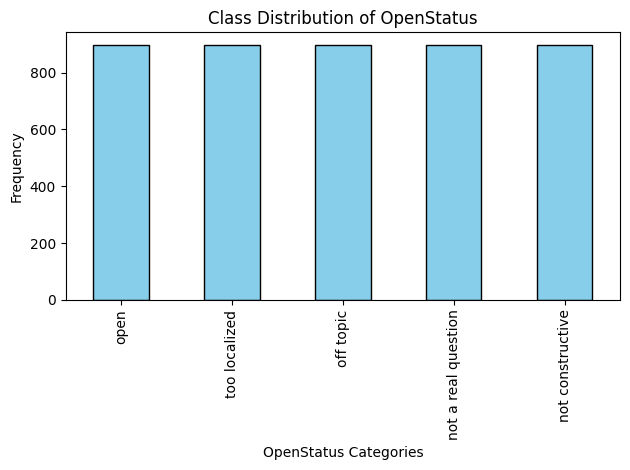

In [62]:
# Visualize the class distribution in the 'OpenStatus' column
so_train_df['OpenStatus'].value_counts().plot(
    kind='bar', 
    title='Class Distribution of OpenStatus', 
    color='skyblue', 
    edgecolor='black'
)
plt.xlabel('OpenStatus Categories')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout for better display
plt.show()


In [63]:
#Splitting the values into X and y
X_train = so_train_df["Text"]
y_train = so_train_df["OpenStatus_encoded"]
print(X_train.shape)
print(y_train.shape)

X_valid = so_valid_df["Text"]
y_valid = so_valid_df["OpenStatus_encoded"]
print(X_valid.shape)
print(y_valid.shape)

X_test = so_test_df["Text"]
y_test = so_test_df["OpenStatus_encoded"]
print(X_test.shape)
print(y_test.shape)

(4485,)
(4485,)
(560,)
(560,)
(560,)
(560,)


Now we train models using: x, y, z. Fit the training data then verify the model accuracy with testing and validation data.

In [64]:
# TF-IDF Vectorizer for text processing
vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_valid_tfidf = vectorizer.transform(X_valid)
X_test_tfidf = vectorizer.transform(X_test)

# Save the vectorizer for later use
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Label Encoder for OpenStatus encoding
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_valid_encoded = encoder.transform(y_valid)
y_test_encoded = encoder.transform(y_test)

# Save the encoder for later use
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


In [65]:
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # 5 classes in OpenStatus
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

nn_model = create_nn_model(X_train_tfidf.shape[1])
nn_model.summary()

# Train the model
nn_model.fit(X_train_tfidf, y_train_encoded, validation_data=(X_valid_tfidf, y_valid_encoded), epochs=5, batch_size=32)

# Save the model
nn_model.save('nn_model.h5')


c:\Users\Shreni\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,288,709 (4.92 MB)

 Trainable params: 1,288,709 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.2829 - loss: 1.5712 - val_accuracy: 0.5036 - val_loss: 1.2607
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5623 - loss: 1.1115 - val_accuracy: 0.5375 - val_loss: 1.1412
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7724 - loss: 0.7068 - val_accuracy: 0.5071 - val_loss: 1.2236
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8877 - loss: 0.4149 - val_accuracy: 0.5036 - val_loss: 1.3767
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9412 - loss: 0.2367 - val_accuracy: 0.4732 - val_loss: 1.6056


In [66]:
def create_dnn_model(input_dim):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

dnn_model = create_dnn_model(X_train_tfidf.shape[1])
dnn_model.summary()

# Train the model
dnn_model.fit(X_train_tfidf, y_train_encoded, validation_data=(X_valid_tfidf, y_valid_encoded), epochs=5, batch_size=32)

# Save the model
dnn_model.save('dnn_model.h5')


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,285,381 (20.16 MB)

 Trainable params: 5,285,381 (20.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.3109 - loss: 1.5160 - val_accuracy: 0.5357 - val_loss: 1.1919
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7023 - loss: 0.8316 - val_accuracy: 0.4893 - val_loss: 1.2782
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.8988 - loss: 0.3317 - val_accuracy: 0.4821 - val_loss: 1.7151
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9783 - loss: 0.0915 - val_accuracy: 0.4804 - val_loss: 2.2294
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9937 - loss: 0.0247 - val_accuracy: 0.4571 - val_loss: 2.6114


In [67]:
from tensorflow.keras.utils import plot_model

In [68]:


# Visualize the NN model
plot_model(nn_model, to_file='nn_model_architecture.png', show_shapes=True, show_layer_names=True)

# Visualize the DNN model
plot_model(dnn_model, to_file='dnn_model_architecture.png', show_shapes=True, show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
